In [9]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
#import file
#read file
file_location = "/home/sym/BA501_2Session/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

In [11]:
my_data.head(5)

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,US,2017-04-02,12624549,6720123150182430132,49.99,3659561261588336546,ANDROID_APPS
1,US,2017-04-01,12624549,17511438899767627798,0.99,3659561261588336546,ANDROID_APPS
2,US,2017-04-04,12624549,1549342062436664018,39.99,3659561261588336546,ANDROID_APPS
3,US,2017-04-04,12624549,7771425263197855716,19.99,3659561261588336546,ANDROID_APPS
4,US,2017-04-01,12624549,17943210556580942992,19.99,3659561261588336546,ANDROID_APPS


In [12]:
# experiment_id
a = my_data.experiment_id
np.unique(a)

array([12624548, 12624549])

In [13]:
#country
c = my_data.country
np.unique(c)

array(['JP', 'US'], dtype=object)

In [14]:
#vertical
v = my_data.vertical
np.unique(v)

array(['ANDROID_APPS', 'COMMERCE', 'MAGAZINES', 'MULTI_CONTAINER', 'MUSIC',
       'OCEAN', 'YOUTUBE'], dtype=object)

In [30]:
a = my_data.experiment_id
a = np.unique(a)
print a
# for any given experiment_id and country, return a list group by date
def GetSeries(my_data, my_id, my_country,my_vertical):
    table = my_data[["date", "spend_usd"]][(my_data.experiment_id == my_id) 
                                              & (my_data.country == my_country)
                                              & (my_data.vertical == my_vertical)]
    series = table.groupby('date')['spend_usd'].sum()
    series = series.cumsum()
    return(series)

[12624548 12624549]


In [18]:
# test if this works
red = GetSeries(my_data, 12624548, 'US', 'OCEAN')
print red
blue = GetSeries(my_data, 12624549, 'US', 'OCEAN')
print blue

date
2017-04-01     62.08
2017-04-02    193.49
2017-04-03    393.77
2017-04-04    482.50
2017-04-05    665.88
2017-04-06    793.41
2017-04-07    916.23
Name: spend_usd, dtype: float64
date
2017-04-01    216.18
2017-04-02    246.05
2017-04-03    522.74
2017-04-04    655.18
2017-04-05    800.42
2017-04-06    867.61
2017-04-07    932.24
Name: spend_usd, dtype: float64


In [19]:
# for any two series, plot the time series
def PlotSeries(index_series, experiment_series, control_series):
    df = pd.DataFrame(
        {
            "experiment": experiment_series.tolist(),
            "control": control_series.tolist()
        },
        index = index_series.tolist(), # a range of dates
        columns = ["experiment", "control"]
    )
    df.plot()

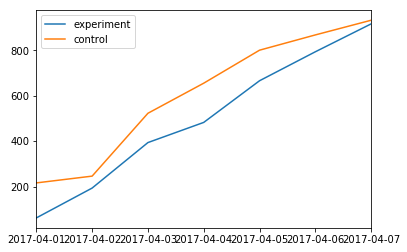

In [20]:
# test if this works
date_series = my_data.date
index_series = np.unique(date_series)
#index_series

PlotSeries(index_series, red, blue)

In [24]:
def PrintCumulativeTimeSeries(my_data, experiment_ids, country, vertical):
    # make sure our x-axis is consistent
    date_series = my_data.date
    index_series = np.unique(date_series) # unique date
    index_series = np.sort(index_series) # sort by date
    
    # data grouping
    my_data = my_data.sort_values("date", ascending=True, inplace=False)
    treatment_series = GetSeries(my_data, experiment_ids[0], country, vertical)
    control_series = GetSeries(my_data, experiment_ids[1], country, vertical)
    
    PlotSeries(index_series, treatment_series, control_series)

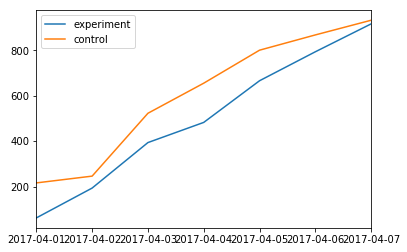

In [31]:
PrintCumulativeTimeSeries(my_data, a, 'US', 'OCEAN')